**Staement:Higher square footage increases home sale price**

**H<sub>0</sub> = Home sale price will decrease of remain the same as square footage increases.**

**H<sub>A</sub>= Home sale price will increase as square footage increases.**


In [39]:
import pandas as pd
import matplotlib as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial Import of Data of 2019 data set

In [25]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})
bldinfo_2019 = pd.read_csv('../../data/EXTR_ResBldg_2019.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str','PIN':'string'})
PINS=pd.read_csv('../../data/PINS.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})

**Now we need to filter our data on what we perceive to be actual sales.** 
**Exlusions:** Assumptions,Mortgage Assumption, Foreclosure,Trust,Executor-to admin guardian,Testamentary Trust,Estate,Settlement,Settlement, Property Settlement,Divorce Settlement
, Tenancy Partition, Community Prop Established, Partial Int - love,aff,gft,Easement, Correction (refiling),Trade,Quit Claim Deed - gift/full or part interest



In [26]:
actual_sales=sales_2019[(sales_2019["SaleReason"]==1)|(sales_2019["SaleReason"]==18)]
actual_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Now one more filter to only display residential sale

In [27]:
res_sales=actual_sales[(actual_sales["PropertyClass"]==7)|(actual_sales["PropertyClass"]==8)]
res_sales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505
42678,2087900,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,,,PEDERSEN LOLITA M,PEDERSEN MICHAEL J,11,6,15,N,N,N,N,1,8,,3023000320


# Lastly, we need to filter out the zeros in the Sales column. This is because of how it will heavily screw the data. 

In [28]:
finalsales=res_sales[res_sales["SalePrice"]!=0]
finalsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


# Next we will filter out our outlier based on Z scores. 

In [33]:
z_score=np.abs(stats.zscore(finalsales["SalePrice"]))
siftedsales=finalsales[z_score <3]
siftedsales

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020
4,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760
42675,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095
42676,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025
42677,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505


In [30]:
sales_and_building=siftedsales.merge(bldinfo_2019, how="inner", on="PIN")
sales_and_building

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN,Unnamed: 0_y,Major_y,Minor_y,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,257,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C,SHAW HEATHER C,11,6,3,N,N,N,N,1,8,,2130430120,149390,213043,0120,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0
1,302,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL,HANSON BRYAN L+KAILI,11,6,3,N,N,N,N,1,8,,9406520630,488069,940652,0630,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500
2,465,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,,,BRASHER DAVID+MONIQUE A,SEITZ ANDREW+MODELSKI EVE,3,6,3,N,N,N,N,1,8,,1402810020,24064,140281,0020,1,1,27001 NE MILLER ST 98019,27001,,NE,MILLER,ST,,98019,1.0,7,0,1080,0,0,0,0,0,1080,0,0,0,0,400,,110,0,80,1,3,0,,3,0,0,2,1,0,0,0,1986,0,0,0,0,3,0
3,594,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,,,LEWIS WILBERT,TALOFA LLC,3,6,15,N,N,N,N,18,8,18 51 52,1245500098,5810,124550,0098,1,1,9823 FORBES CREEK DR 98033,9823,,,FORBES CREEK,DR,,98033,1.0,7,0,1140,0,0,0,0,0,1760,1030,620,6,410,100,,0,0,220,5,2,0,,3,0,1,1,0,1,0,0,1980,0,0,0,0,3,0
4,599,2980648,797320,2320,2019-03-27,540000,,,,,,,,VONG SAM A+NGUYEN THO THI+PHAM KINH,MARTINEZ JAVIER JIMENEZ,3,6,3,N,N,N,N,1,8,,7973202320,377823,797320,2320,1,1,10246 5TH AVE SW 98146,10246,,,5TH,AVE,SW,98146,1.0,6,0,860,0,0,0,0,0,1240,380,380,6,0,0,,0,0,0,5,2,0,,3,1,1,1,1,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,2087715,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,,,RILEY RYAN P-PR,SENGUPTA RAJIV+JENEA,3,6,24,N,N,N,N,18,8,12,9290850760,416400,929085,0760,1,1,10316 214TH AVE NE 98052,10316,,,214TH,AVE,NE,98052,1.0,10,0,2880,0,0,0,0,0,2880,0,0,0,0,870,,130,0,470,7,2,0,,4,1,0,2,2,0,0,0,1989,0,0,0,0,3,0
28767,2087770,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,,,PREMIER LOTS 2 LLC,RUSSELL ALBERT,11,6,3,N,N,N,N,1,8,,4059400095,222599,405940,0095,1,1,11234 CORNELL AVE S 98178,11234,,,CORNELL,AVE,S,98178,1.0,6,0,1430,0,0,0,0,0,1430,0,0,0,0,0,,0,0,200,4,3,0,,4,1,0,2,1,0,0,0,1944,0,0,0,0,4,0
28768,2087773,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,,,HIRAGA SHYOKO,STOECKMANN DOUGLAS A,11,6,3,N,N,N,N,1,8,,3816700025,358894,381670,0025,1,1,18741 62ND AVE NE 98028,18741,,,62ND,AVE,NE,98028,1.0,8,0,1520,0,0,0,0,0,2270,1520,750,7,0,440,Y,0,0,450,5,1,0,,3,0,1,1,0,1,0,1,1958,0,0,0,0,3,0
28769,2087774,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,,,KYLE JASON C+HEATHER,SAYAH MICHAEL+PRIYA,11,6,3,N,N,N,N,1,8,,6150200505,332441,615020,0505,1,1,13522 BURKE AVE N 98133,13522,,,BURKE,AVE,N,98133,2.0,7,0,840,0,1410,0,0,0,2250,0,0,0,0,0,,450,0,0,5,2,0,,3,1,0,2,1,0,0,0,194

In [47]:
fsm_df = pd.DataFrame([sales_and_building.SqFtTotLiving, sales_and_building.SalePrice])
fsm_df= fsm_df.transpose()
fsm_df

,SqFtTotLiving,SalePrice
0,1930,560000
1,1975,435000
2,1080,450000
3,1760,193000
4,1240,540000
...,...,...
28766,2880,1205000
28767,1430,442000
28768,2270,680000
28769,2250,745000


In [11]:
fsm_df=fsm_df.dropna()

In [46]:
fsm_df.info()

NameError: name 'fsm_df' is not defined

In [44]:
fsm = ols(formula=formula, data=fsm_df).fit()

NameError: name 'formula' is not defined

In [45]:
fsm.summary()

NameError: name 'fsm' is not defined

In [18]:

rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.044020069261646255
----------
Beta values of FSM:
Intercept    2063.322246
SalePrice    0.000182   
dtype: float64


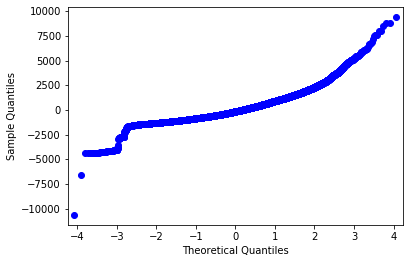

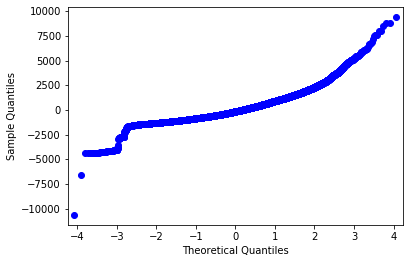

In [19]:

fsm_resids = fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids)

In [21]:
y_hat = fsm.predict()

In [22]:
# plot y_hat against the residuals (stored in fsm_resids) in a scatter plot
plt.scatter(y_hat, fsm_resids );
# Your code here

NameError: name 'plt' is not defined

In [15]:
#from scipy.stats import iqr
#iqr(sales_2019['SalePrice'])

In [16]:
#sales_2019.SalePribce.quantile([0.25,0.50,0.75])


In [ ]:
sna